In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [91]:
from sklearn.datasets import fetch_california_housing

In [92]:
housing = fetch_california_housing()

In [93]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [94]:
#description of the dataset
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [95]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [96]:
#preparing the dataset
df = pd.DataFrame(housing.data,columns=housing.feature_names)

In [97]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [98]:
df["Price"] = housing.target

In [99]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [101]:
df.duplicated().sum()

np.int64(0)

In [102]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [103]:
#summarizing the stats
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<Axes: >

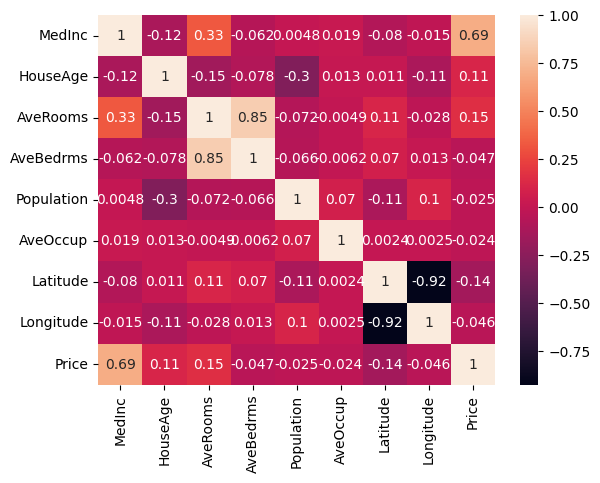

In [104]:
#EDA
#correlation
correlation = df.corr()
sns.heatmap(correlation,annot=True)

In [105]:
#We will keep Latitude and Longitude as they are important for geographical purposes
df= df.drop(columns=["AveOccup","Population","AveBedrms"])

<Axes: xlabel='Latitude', ylabel='Longitude'>

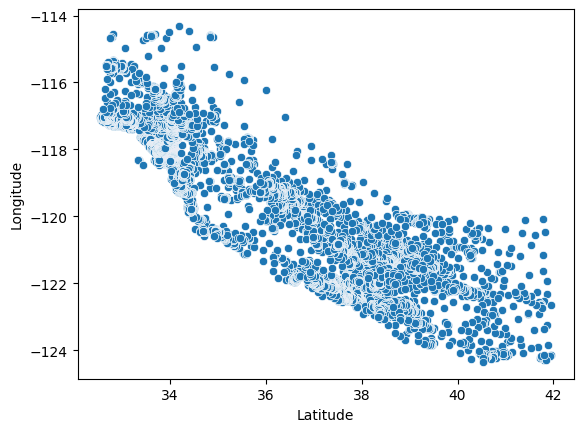

In [106]:
sns.scatterplot(df,x="Latitude",y="Longitude")

In [107]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'Latitude', 'Longitude', 'Price'], dtype='object')

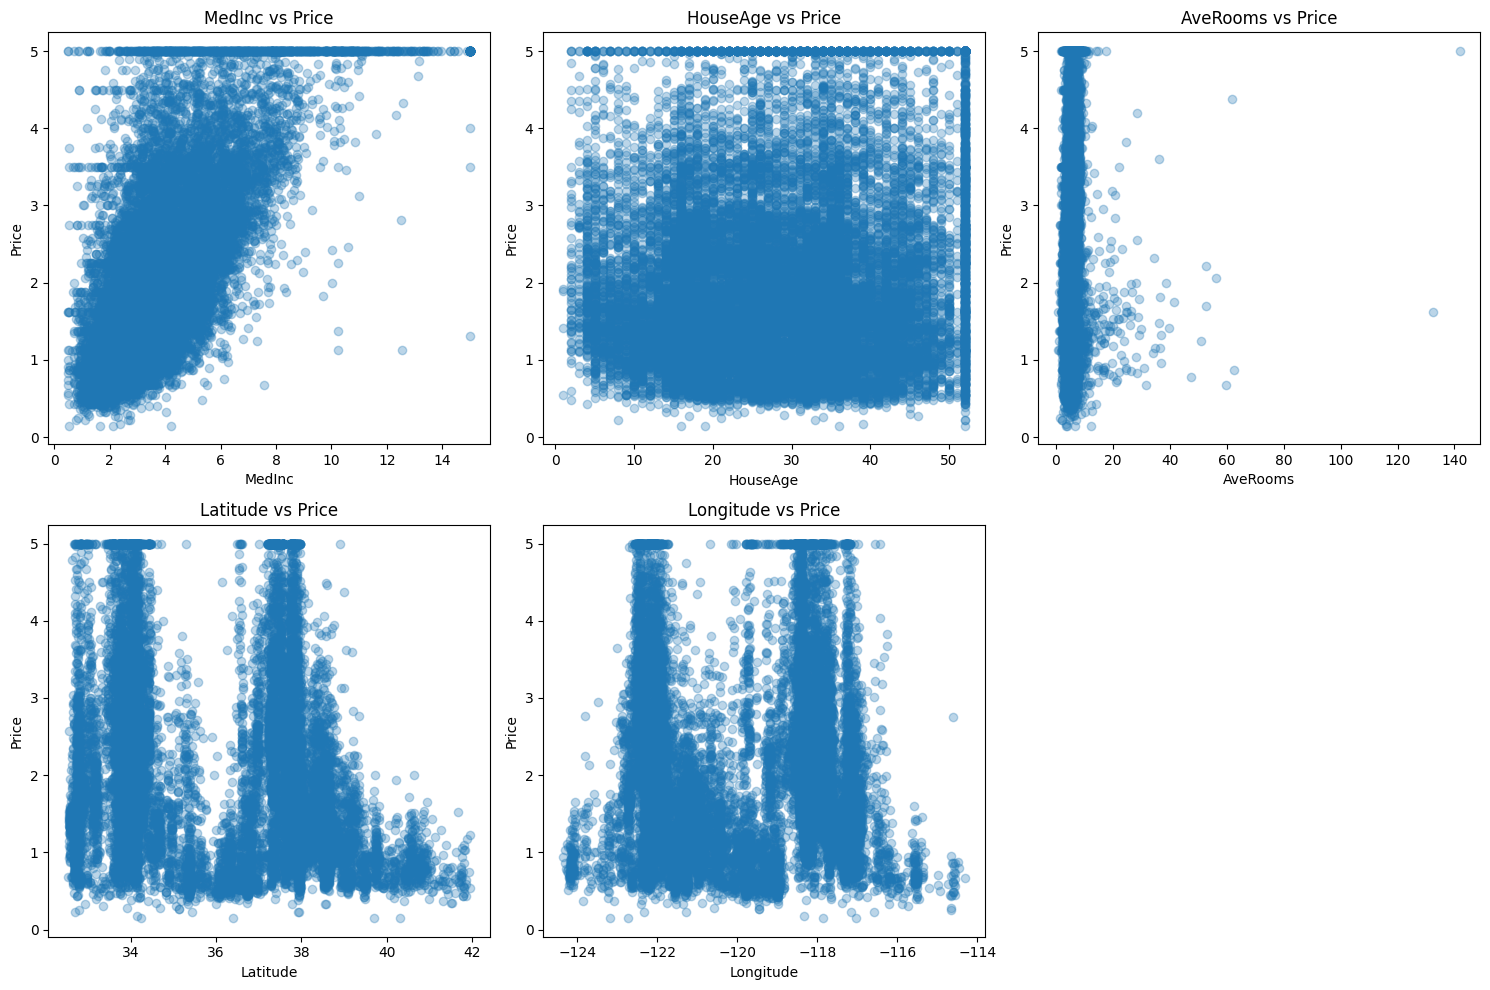

In [108]:
features = ['MedInc', 'HouseAge', 'AveRooms', 'Latitude', 'Longitude']
target = 'Price'

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(features):
    axes[i].scatter(df[col], df[target], alpha=0.3)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(target)
    axes[i].set_title(f"{col} vs {target}")

fig.delaxes(axes[-1])  # remove empty subplot
plt.tight_layout()
plt.show()


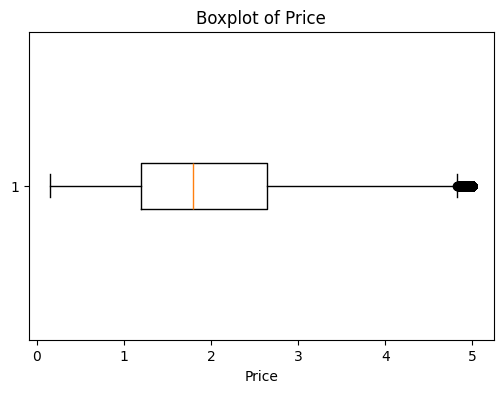

In [109]:
plt.figure(figsize=(6,4))
plt.boxplot(df['Price'], vert=False)
plt.xlabel("Price")
plt.title("Boxplot of Price")
plt.show()


<Axes: xlabel='Latitude', ylabel='Price'>

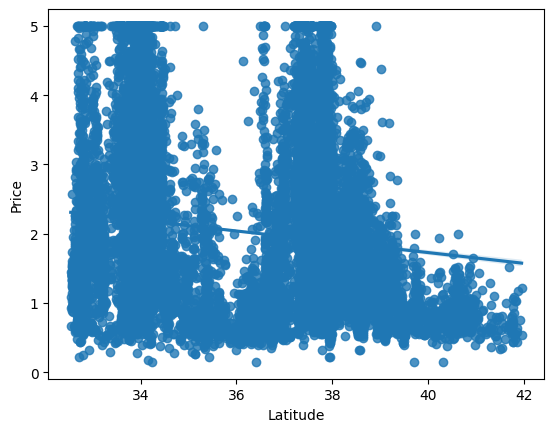

In [110]:
sns.regplot(x="Latitude",y="Price",data=df)

<Axes: xlabel='Latitude', ylabel='Price'>

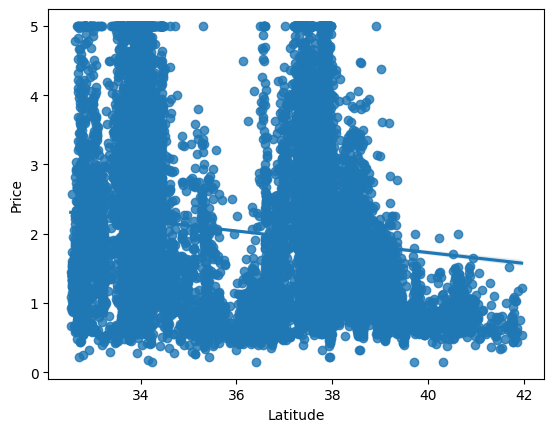

In [111]:
sns.regplot(x="Latitude",y="Price",data=df)

In [112]:
#Separating independent and dependent features
X = df.drop("Price",axis = 1)
y = df["Price"]

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [114]:
#Standardizing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [115]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [116]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [117]:
#printing coefficients
print(regression.coef_)

[ 0.70068024  0.12066647  0.04941249 -0.97803007 -0.93438184]


In [118]:
print(regression.intercept_)

2.0666362048018536


In [119]:
#predictions
reg_pred = regression.predict(X_test)

In [120]:
reg_pred

array([0.74371999, 1.75304463, 2.46124888, ..., 1.38533408, 1.78708355,
       2.20104104], shape=(6812,))

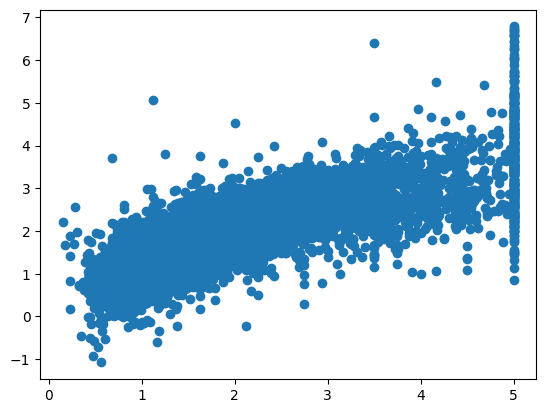

In [121]:
plt.scatter(y_test,reg_pred)

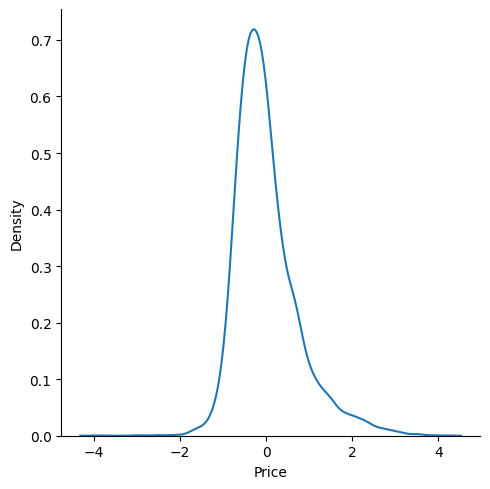

In [122]:
#residuals(errors)
residuals = y_test - reg_pred
sns.displot(residuals,kind="kde")

In [123]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(mean_squared_error(y_test,reg_pred))


0.5395458994563171


In [124]:
#r square and adjusted r square
from sklearn.metrics import r2_score
r2= r2_score(y_test,reg_pred)
n = len(y_test)           # number of observations
k = X_test.shape[1]       # number of predictors (columns)

adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print("R2:", r2)
print("Adjusted R2:", adj_r2)

R2: 0.5951154034618349
Adjusted R2: 0.5948179566527413


In [133]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming you already have X (features) and y (target = house prices)


# 2. Define model
xgb_model = XGBRegressor(
    n_estimators=500,      # number of trees
    learning_rate=0.05,    # step size shrinkage
    max_depth=6,           # tree depth (controls complexity)
    subsample=0.8,         # fraction of data to train each tree
    colsample_bytree=0.8,  # fraction of features used per tree
    random_state=42
)

# 3. Train model
xgb_model.fit(X_train, y_train)

# 4. Predictions
y_pred = xgb_model.predict(X_test)

# 5. Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
n = len(y_test)
k = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print("MSE:", mse)
print("R2:", r2)
print("Adjusted R2:", adj_r2)


MSE: 0.2069304194263008
R2: 0.8420871477055314
Adjusted R2: 0.8418955988793615


NEW DATA PREDICTION REQUIREMENT

In [147]:
input_row = X.iloc[[0]]  # double brackets to keep as DataFrame
prediction = xgb_model.predict(input_row)

print("Predicted Price:", prediction[0])
print("Actual Price:", y.iloc[0])

Predicted Price: 4.227147
Actual Price: 4.526


PICKLING THE MODEL

In [149]:
import pickle
pickle.dump(xgb_model,open("xgbmodel.pkl","wb"))

In [150]:
pickled_model = pickle.load(open("xgbmodel.pkl","rb"))